## Web Service Client

En este notebook vamos a consumir un servicio de machine learning. El servicio debe ser levantando con el script server.py por separado.

In [115]:
import requests

# url del servicio
url = 'http://127.0.0.1:1080/predict'

# cuerpo del mensaje
body = {
    "petal_length": "2.1",
    "sepal_length": "2",
    "petal_width": "0.5",
    "sepal_width": "3"
}



# enviamos los datos por POST
response = requests.post(url, data=body)

# imprimimos el mensaje
print(response.json())

{'message': 'The method is not allowed for the requested URL.'}


### EJERCICIO 1: 

Modifique el server.py para que acepte requests por GET. Modifique el codigo del cliente para enviar los datos por GET

In [35]:
# DEFINA SU CLIENTE GET AQUI:
import requests

# url del servicio
url = 'http://127.0.0.1:1080/get-predict?petal_length=2.1&sepal_length=2&petal_width=0.5&sepal_width=3'

response = requests.get(url)
print(response.json())

{'Prediccion': 2}


### EJERCICIO 2:

* Entrene un modelo de machine learning con MNIST y salve su modelo en un archivo pickle. [https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html]
* Modifique el server.py para que agregue la ruta /predict-number y que sea capaz de predecir si una imagen pertecene a un numero del 0 al 9
* Va a enviar la imagen desde el cliente (este notebook) como un base64 hacia el server.py
* el server.py va recibir la imagen la reconstruye en una imagen nuevamente y la manda al modelo de ML
* la imagen que ingresa al server.py debe salvarla en un folder (images)

### Mnist Logistics Regression

In [140]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / train_samples, penalty='l1', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Automatically created module for IPython interactive environment
Sparsity with L1 penalty: 75.46%
Test score with L1 penalty: 0.8229


### Salvar modelo con Pickle

In [45]:

import pickle

pkl_filename = "ModelMnistLR.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

In [46]:
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

pkl_filename = "ModelMnistLR.pkl"

with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)
    


LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1)


### Validar el modelo

In [50]:
result = model.predict([X_test[0]])
result

array(['7'], dtype=object)

### Explorar el elemento 5 de las imagenes

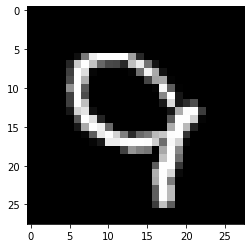

In [94]:
first_image=X[5]

pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

In [99]:
first_image

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Codificacion base 64 y llamado al web api

In [139]:
# DEFINA SU CLIENTE GET AQUI:

import requests
import base64

# url del servicio
url = 'http://127.0.0.1:1080/post_mnist'

 
with open("9.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())


encoded_string = str(encoded_string)
encoded_string=encoded_string.replace("b'", "")
encoded_string=encoded_string.replace("'", "")

body= {"base64": encoded_string }


headers = {"Content-Type":"application/json"}

body= str(body)
body=body.replace("'", '"')


# enviamos los datos por POST
response = requests.post(url, data=body,headers =headers)

# imprimimos el mensaje
print(response.json())

{'Prediccion': 9}
